# Redes Neurais: Autoencoders
* Redução de Dimensionalidade e Reconstrução
* Problemas não supervisionados (detecção de outliers)

Autor: Arthur Schneider Figueira

In [1]:
# criar pyenv
!python3 -m venv env-rede-neural

/bin/bash: linha 1: source: env-rede-neural: é um diretório


In [1]:
!source env-rede-neural

zsh:source:1: arquivo ou diretório inexistente: env-rede-neural


In [1]:
%pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (489.9 MB)
  Using cached pandas-2.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached matplotlib-3.8.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mathzz

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pd.set_option('display.max_columns', 25)

In [3]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Contexto & Entendimento da base

Vamos analisar um banco de dados de cereais. Vamos capturar casos que sejam mais atípicos para compreender como as Redes Neurais Autoencoders podemos capturar anomalias em bancos de dados.

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/Bases/cereal.csv")
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [8]:
X_train = df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']]
X_train

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,70,4,1,130,10.0,5.0,6,280,25
1,120,3,5,15,2.0,8.0,8,135,0
2,70,4,1,260,9.0,7.0,5,320,25
3,50,4,0,140,14.0,8.0,0,330,25
4,110,2,2,200,1.0,14.0,8,-1,25
...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25
73,110,1,1,140,0.0,13.0,12,25,25
74,100,3,1,230,3.0,17.0,3,115,25
75,100,3,1,200,3.0,17.0,3,110,25


In [11]:
vars_exp = []

for col in list(X_train.columns):
  maximo,minimo = X_train[col].max(),X_train[col].min()
  colname = col+"_MaxMin"
  X_train[colname] = (df[col]-minimo) / (maximo-minimo)
  vars_exp.append(colname)

X_train[vars_exp].describe()

<ipython-input-11-ad1d243ca695>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[colname] = (df[col]-minimo) / (maximo-minimo)
<ipython-input-11-ad1d243ca695>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[colname] = (df[col]-minimo) / (maximo-minimo)
<ipython-input-11-ad1d243ca695>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,calories_MaxMin,protein_MaxMin,fat_MaxMin,sodium_MaxMin,fiber_MaxMin,carbo_MaxMin,sugars_MaxMin,potass_MaxMin,vitamins_MaxMin
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.517119,0.309091,0.202597,0.498985,0.153711,0.649892,0.495130,0.293287,0.282468
std,0.177128,0.218958,0.201295,0.261976,0.170240,0.178290,0.277805,0.215368,0.223425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454545,0.200000,0.000000,0.406250,0.071429,0.541667,0.250000,0.123867,0.250000
50%,0.545455,0.400000,0.200000,0.562500,0.142857,0.625000,0.500000,0.274924,0.250000
75%,0.545455,0.400000,0.400000,0.656250,0.214286,0.750000,0.750000,0.365559,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
num_features = len(vars_exp)

# Defina a arquitetura do autoencoder (usando apenas parte das camadas)
input_layer = Input(shape=(num_features,))
encoded_7 = Dense(7, activation='relu')(input_layer)
encoded_5 = Dense(5, activation='relu')(encoded_7)
encoded_3 = Dense(3, activation='relu')(encoded_5)

decoded_5 = Dense(5, activation='relu')(encoded_3)
decoded_7 = Dense(7, activation='relu')(decoded_5)
decoded_9 = Dense(num_features, activation='relu')(decoded_7)

autoencoder = Model(input_layer, decoded_9)

# Compile o modelo
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_11 (Dense)            (None, 7)                 70        
                                                                 
 dense_12 (Dense)            (None, 5)                 40        
                                                                 
 dense_13 (Dense)            (None, 3)                 18        
                                                                 
 dense_14 (Dense)            (None, 5)                 20        
                                                                 
 dense_15 (Dense)            (None, 7)                 42        
                                                                 
 dense_16 (Dense)            (None, 9)                 72  

In [34]:
#Callbacks
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 20:
        return 0.05
    elif epoch < 50:
        return 0.001
    elif epoch < 100:
        return 0.0005
    elif epoch < 200:
        return 0.00001
    else:
        return 0.00005

# Criando o callback para o Learning Rate Scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [35]:
X_train2 = X_train[vars_exp]

history1 = autoencoder.fit(X_train2.values, X_train2.values, epochs=300, batch_size=11, verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback])

# Use o autoencoder para reconstruir os dados
reconstructed_data = autoencoder.predict(X_train2)

Epoch 1/300
7/7 [==============================] - 1s 2ms/step - loss: 0.1335 - lr: 0.0500
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1072 - lr: 0.0500
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1025 - lr: 0.0500
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1021 - lr: 0.0500
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1000 - lr: 0.0500
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0971 - lr: 0.0500
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0937 - lr: 0.0500
Epoch 8/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0919 - lr: 0.0500
Epoch 9/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0908 - lr: 0.0500
Epoch 10/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0920 - lr: 0.0500
Epoch 11/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0927 - lr: 0.05

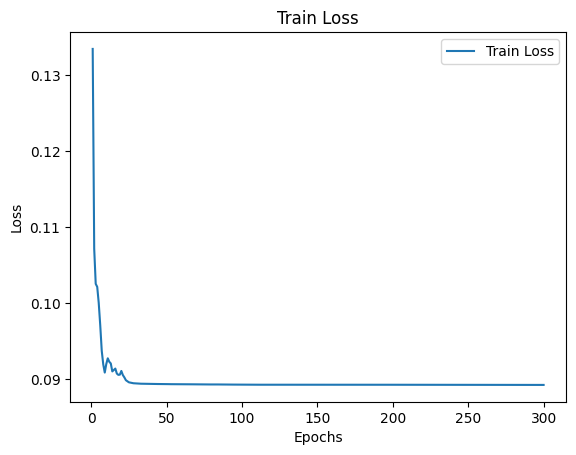

In [36]:
train_loss1 = history1.history['loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss1) + 1)
plt.plot(epochs, train_loss1, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.legend()
plt.show()

In [37]:
# Calcule o RMSE entre os dados originais e reconstruídos
rmse = (np.mean(np.square(X_train2 - reconstructed_data)))**0.5
print(f"RMSE: {rmse}")

RMSE: calories_MaxMin    0.170361
protein_MaxMin     0.131941
fat_MaxMin         0.192899
sodium_MaxMin      0.562785
fiber_MaxMin       0.058150
carbo_MaxMin       0.157944
sugars_MaxMin      0.566857
potass_MaxMin      0.069190
vitamins_MaxMin    0.219417
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [38]:
reconstructed_data

array([[0.36797005, 0.6516942 , 0.2969141 , 0.        , 0.6777614 ,
        0.38398707, 0.        , 0.9282135 , 0.22612129],
       [0.51153934, 0.44661894, 0.24387252, 0.        , 0.24545568,
        0.6219362 , 0.        , 0.42437676, 0.29746568],
       [0.36276987, 0.6591222 , 0.2988353 , 0.        , 0.69341975,
        0.3753684 , 0.        , 0.9464628 , 0.22353716],
       [0.3301909 , 0.7406169 , 0.30621037, 0.        , 0.84913075,
        0.31428954, 0.        , 1.1179875 , 0.2101247 ],
       [0.52600074, 0.14269699, 0.15403697, 0.        , 0.03737555,
        0.68561494, 0.        , 0.13034655, 0.26504776],
       [0.55715925, 0.35125715, 0.21494952, 0.        , 0.08958647,
        0.70392454, 0.        , 0.23145615, 0.31604743],
       [0.52309275, 0.12457906, 0.148765  , 0.        , 0.03328864,
        0.68370944, 0.        , 0.12209208, 0.2604758 ],
       [0.5450008 , 0.39030114, 0.22810465, 0.        , 0.13947815,
        0.6791945 , 0.        , 0.29768622, 0.31294015],


In [39]:
df['calories_pred'] = [reconstructed_data[i][0] for i in range(0,len(reconstructed_data))]
df['protein_pred'] = [reconstructed_data[i][1] for i in range(0,len(reconstructed_data))]
df['fat_pred'] = [reconstructed_data[i][2] for i in range(0,len(reconstructed_data))]
df['sodium_pred'] = [reconstructed_data[i][3] for i in range(0,len(reconstructed_data))]
df['fiber_pred'] = [reconstructed_data[i][4] for i in range(0,len(reconstructed_data))]
df['carbo_pred'] = [reconstructed_data[i][5] for i in range(0,len(reconstructed_data))]
df['sugars_pred'] = [reconstructed_data[i][6] for i in range(0,len(reconstructed_data))]
df['potass_pred'] = [reconstructed_data[i][7] for i in range(0,len(reconstructed_data))]
df['vitamins_pred'] = [reconstructed_data[i][8] for i in range(0,len(reconstructed_data))]

In [53]:
cols = []
for col in ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']:
  colname = col+" menos "+col+"_pred"
  maximo,minimo = X_train[col].max(),X_train[col].min()
  colpred = col+"_pred2"
  df[colpred] = (df[col+'_pred']*(maximo-minimo)) + (minimo)
  df[colname] = df[col] - df[col+"_pred2"]
  print(colpred, df[colpred].min(),df[colpred].max())
  cols.append(colname)

calories_pred2 86.321 111.45566
protein_pred2 1.0126544 4.7030845
fat_pred2 0.5600268 1.5310519
sodium_pred2 0.0 0.0
fiber_pred2 0.19476518 11.887831
carbo_pred2 6.5429487 15.968807
sugars_pred2 -1.0 -1.0
potass_pred2 24.293375 369.05386
vitamins_pred2 21.01247 31.643808


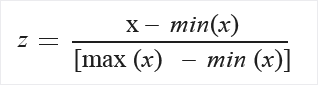

Logo, para retornar ao valor na escala original, fazemos:

1. Normalizacao * (max - min) = Observado - Minimo

2. Normalizacao * (max - min) + Minimo = **Observado**

In [42]:
df[['name','calories','calories_pred2','calories menos calories_pred']].head()

,name,calories,calories_pred2,calories menos calories_pred
0,100% Bran,70,90.476700,-20.476700
1,100% Natural Bran,120,106.269333,13.730667
2,All-Bran,70,89.904686,-19.904686
3,All-Bran with Extra Fiber,50,86.320999,-36.320999
4,Almond Delight,110,107.860077,2.139923


In [54]:
df[cols].describe()

,calories menos calories_pred,protein menos protein_pred,fat menos fat_pred,sodium menos sodium_pred,fiber menos fiber_pred,carbo menos carbo_pred,sugars menos sugars_pred,potass menos potass_pred,vitamins menos vitamins_pred
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,-0.041480,-0.000954,-0.000824,159.675325,0.005515,-0.001902,7.922078,0.135833,0.008384
std,18.862517,0.664028,0.970822,83.832295,0.819417,3.815510,4.444885,23.051759,22.085549
min,-60.122604,-1.062011,-1.531052,0.000000,-2.564775,-14.103393,0.000000,-65.561523,-31.470078
25%,-9.661591,-0.372873,-0.743825,130.000000,-0.461137,-2.385388,4.000000,-9.412479,-6.249384
50%,1.409538,-0.076520,-0.133524,180.000000,0.047306,-0.356831,8.000000,-0.070057,-3.598812
75%,5.883507,0.139104,0.717914,210.000000,0.529240,2.473267,12.000000,10.385551,-0.406282
max,52.070694,2.894777,3.780637,320.000000,2.112169,7.711025,16.000000,58.401321,71.627956


In [57]:
df.loc[(df["calories menos calories_pred"] <= -60) | (df["calories menos calories_pred"] >= 52), ['name','calories','calories_pred2','calories menos calories_pred']]

,name,calories,calories_pred2,calories menos calories_pred
46,Mueslix Crispy Blend,160,107.929306,52.070694
55,Puffed Wheat,50,110.122604,-60.122604


In [59]:
df.loc[(df['protein menos protein_pred'] <= -1) | (df['protein menos protein_pred'] >= 2.8), ['name','protein','protein_pred2','protein menos protein_pred']]

,name,protein,protein_pred2,protein menos protein_pred
8,Bran Chex,2,3.062011,-1.062011
67,Special K,6,3.105223,2.894777


Para detecção de outliers, podemos:

1. Calcular o erro total pelas linhas para saber quais produtos são mais discrepantes/atípicos;

2. Calcular o erro por tipo de valor nutricional. Dessa maneira, saberemos qual ou quais os aspectos que fez com que o erro aumentasse mais.

O cálculo do erro pode ser feito por diferentes métricas, como: o erro absoluto, o RMSE, entre outros.